<a href="https://colab.research.google.com/github/tkoyama010/Colaboratory/blob/master/Cantilever.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 片持ちはりの検討

有限要素法ライブラリGetFEM++を使用して片持ちはりの検討を行います。まずは、GetFEM++をインストールします。

## ライブラリのインストール

In [1]:
!apt install python-getfem++=5.2+dfsg1-6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-getfem++ is already the newest version (5.2+dfsg1-6).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


次に可視化ソフトMayavi2をインストールします。

In [2]:
!apt install mayavi2=4.5.0-1

Reading package lists... Done
Building dependency tree       
Reading state information... Done
mayavi2 is already the newest version (4.5.0-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


colab上にはディスプレイがないため、Mayavi2用に仮想ディスプレイを設定します。

In [3]:
!apt-get -y install xvfb=2:1.19.6-1ubuntu4.4
!pip install pyvirtualdisplay==0.2.5

from pyvirtualdisplay import Display
import os

display = Display(visible=0, size=(1280, 1024))
display.start()
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)


Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.4).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


No handlers could be found for logger "pyvirtualdisplay.abstractdisplay"


## モデルの作成

準備が整ったのでライブラリをインポートします。

In [0]:
import getfem as gf
import numpy as np


検討ケースは次の通りです。GetFEM++では下記の有限要素法と積分法をそれぞれFEM_PRODUCTとIM_PRODUCTを使用して2次元化します。2次要素についてはGauss積分点が3であるとします。IM_GAUSS1D(K)はK/2+1点の積分点を表します。要素は平面ひずみ要素を使用します。これらのメッシュ、有限要素法と積分法を設定します。

In [0]:
cases = [
    "case11",
    "case12",
    "case13",
    "case14",
    "case21",
    "case22",
    "case23",
    "case24",
    "case31",
    "case32",
    "case33",
    "case34",
    "case41",
    "case42",
    "case43",
    "case44",
]


In [0]:
xs = [
    4,
    4,
    4,
    16,
    4,
    4,
    4,
    16,
    4,
    4,
    4,
    16,
    4,
    4,
    4,
    16,
]
ys = [
    1,
    2,
    4,
    8,
    1,
    2,
    4,
    8,
    1,
    2,
    4,
    8,
    1,
    2,
    4,
    8,
]


In [0]:
fem_names = [
    "FEM_PK(1, 2)",
    "FEM_PK(1, 2)",
    "FEM_PK(1, 2)",
    "FEM_PK(1, 2)",
    "FEM_PK(1, 1)",
    "FEM_PK(1, 1)",
    "FEM_PK(1, 1)",
    "FEM_PK(1, 1)",
    "FEM_PK(1, 1)",
    "FEM_PK(1, 1)",
    "FEM_PK(1, 1)",
    "FEM_PK(1, 1)",
    "FEM_PK_WITH_CUBIC_BUBBLE(1, 1)",
    "FEM_PK_WITH_CUBIC_BUBBLE(1, 1)",
    "FEM_PK_WITH_CUBIC_BUBBLE(1, 1)",
    "FEM_PK_WITH_CUBIC_BUBBLE(1, 1)",
]


In [0]:
methods = [
    "IM_GAUSS1D(4)",
    "IM_GAUSS1D(4)",
    "IM_GAUSS1D(4)",
    "IM_GAUSS1D(4)",
    "IM_GAUSS1D(2)",
    "IM_GAUSS1D(2)",
    "IM_GAUSS1D(2)",
    "IM_GAUSS1D(2)",
    "IM_GAUSS1D(0)",
    "IM_GAUSS1D(0)",
    "IM_GAUSS1D(0)",
    "IM_GAUSS1D(0)",
    "IM_GAUSS1D(4)",
    "IM_GAUSS1D(4)",
    "IM_GAUSS1D(4)",
    "IM_GAUSS1D(4)",
]


In [9]:
import pandas as pd

pd.options.display.float_format = "{:.2f}".format


data = []

columns = ["ケース名", "メッシュ", "有限要素法", "積分法"]

for case, x, y, fem_name, method in zip(cases, xs, ys, fem_names, methods):
    data.append([case, str(x) + "x" + str(y), fem_name, method])

df = pd.DataFrame(data=data, columns=columns)
df


,ケース名,メッシュ,有限要素法,積分法
0,case11,4x1,"FEM_PK(1, 2)",IM_GAUSS1D(4)
1,case12,4x2,"FEM_PK(1, 2)",IM_GAUSS1D(4)
2,case13,4x4,"FEM_PK(1, 2)",IM_GAUSS1D(4)
3,case14,16x8,"FEM_PK(1, 2)",IM_GAUSS1D(4)
4,case21,4x1,"FEM_PK(1, 1)",IM_GAUSS1D(2)
5,case22,4x2,"FEM_PK(1, 1)",IM_GAUSS1D(2)
6,case23,4x4,"FEM_PK(1, 1)",IM_GAUSS1D(2)
7,case24,16x8,"FEM_PK(1, 1)",IM_GAUSS1D(2)
8,case31,4x1,"FEM_PK(1, 1)",IM_GAUSS1D(0)
9,case32,4x2,"FEM_PK(1, 1)",IM_GAUSS1D(0)


### メッシュ

モデル全体のサイズは長さL=10mm、高さh=1mm、奥行きb=1mmとします。一般的にスレンダー比が1:10であれば、はり要素とみなせるといわれます。

In [0]:
L = 10.0
b = 1.0
h = 1.0

meshs = []

for case, x, y in zip(cases, xs, ys):
    X = np.arange(x + 1) * L / x
    Y = np.arange(y + 1) * h / y
    mesh = gf.Mesh("cartesian", X, Y)
    meshs.append(mesh)
    mesh.export_to_vtk("mesh_" + case + ".vtk")


各メッシュの画像を出力します。

In [11]:
from mayavi import mlab

mlab.init_notebook()

for case in cases:
    vtk_file_reader = mlab.pipeline.open("mesh_" + case + ".vtk")
    extract_edges = mlab.pipeline.extract_edges(vtk_file_reader)
    surface = mlab.pipeline.surface(extract_edges)
    mlab.show()
    mlab.savefig("mesh_" + case + ".png")
    mlab.clf()


/usr/lib/python2.7/dist-packages/traits/etsconfig/etsconfig.py:429: UserWarning: Environment variable "HOME" not set, setting home directory to /tmp
  (environment_variable, parent_directory))


Notebook initialized with x3d backend.


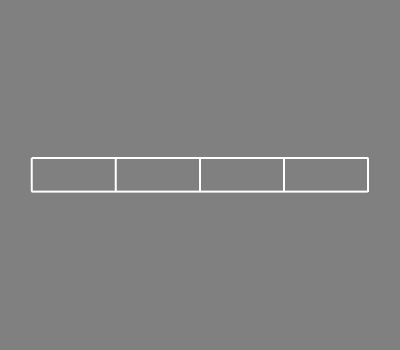

In [12]:
from IPython.display import Image, display_png

display_png(Image("mesh_" + cases[0] + ".png"))


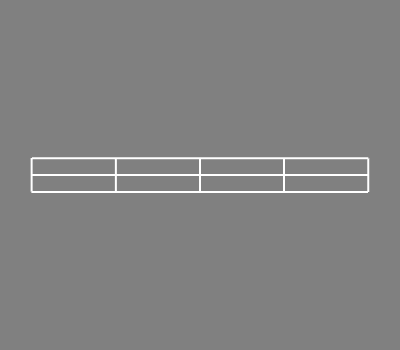

In [13]:
from IPython.display import Image, display_png

display_png(Image("mesh_" + cases[1] + ".png"))


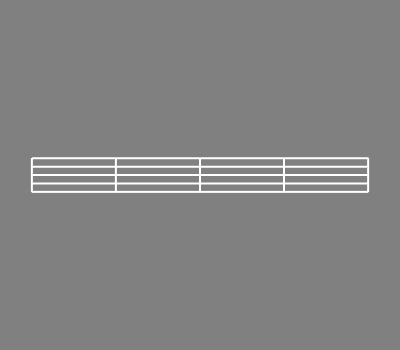

In [14]:
from IPython.display import Image, display_png

display_png(Image("mesh_" + cases[2] + ".png"))


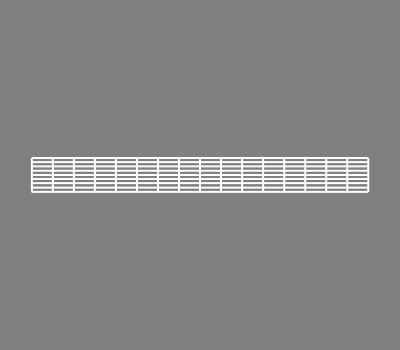

In [15]:
from IPython.display import Image, display_png

display_png(Image("mesh_" + cases[3] + ".png"))


### 領域

メッシュの左側面にDirichlet条件を設定する領域を設定します。右側面にはNeumann条件を設定するための領域を設定します。

In [0]:
TOP_BOUND = 1
RIGHT_BOUND = 2
LEFT_BOUND = 3
BOTTOM_BOUND = 4

for mesh in meshs:
    fb1 = mesh.outer_faces_with_direction([0.0, 1.0], 0.01)
    fb2 = mesh.outer_faces_with_direction([1.0, 0.0], 0.01)
    fb3 = mesh.outer_faces_with_direction([-1.0, 0.0], 0.01)
    fb4 = mesh.outer_faces_with_direction([0.0, -1.0], 0.01)
    mesh.set_region(TOP_BOUND, fb1)
    mesh.set_region(RIGHT_BOUND, fb2)
    mesh.set_region(LEFT_BOUND, fb3)
    mesh.set_region(BOTTOM_BOUND, fb4)


### 有限要素法
MeshFemオブジェクトを作成しメッシュと有限要素法を関連付けます。

In [0]:
fems = []
for fem_name in fem_names:
    fems.append(gf.Fem("FEM_PRODUCT(" + fem_name + "," + fem_name + ")"))


In [0]:
mfus = []
for mesh, fem in zip(meshs, fems):
    mfu = gf.MeshFem(mesh, 2)
    mfu.set_fem(fem)
    mfus.append(mfu)


### 積分法
積分法をメッシュと関連付けます。

In [0]:
ims = []
for method in methods:
    ims.append(gf.Integ("IM_PRODUCT(" + method + ", " + method + ")"))


In [0]:
mims = []
for mesh, im in zip(meshs, ims):
    mim = gf.MeshIm(mesh, im)
    mims.append(mim)


### 変数
モデルオブジェクトを定義して変数'u'を設定します。

In [0]:
mds = []
for mfu in mfus:
    md = gf.Model("real")
    md.add_fem_variable("u", mfu)
    mds.append(md)


### 物性値
モデルオブジェクトに対し物性値を定数として定義しておきます。鋼材を仮定しヤング率 E = 205000e+6 N/m2 とします。また、ポアソン効果を無視するためポアソン比 Nu = 0.0 とします。

In [0]:
E = 10000  # N/mm2
Nu = 0.0

for md in mds:
    md.add_initialized_data("E", E)
    md.add_initialized_data("Nu", Nu)


### 平面ひずみ要素
変数'u'に対し平面ひずみ要素を定義します。

In [0]:
for md, mim in zip(mds, mims):
    md.add_isotropic_linearized_elasticity_brick_pstrain(mim, "u", "E", "Nu")


### 境界条件

左側面の領域にDirichlet条件を設定します。

In [0]:
for (md, mim, mfu, fem) in zip(mds, mims, mfus, fems):
    if fem.is_lagrange():
        md.add_Dirichlet_condition_with_simplification("u", LEFT_BOUND)
    else:
        md.add_Dirichlet_condition_with_multipliers(mim, "u", mfu, LEFT_BOUND)


右側面にNeumann境界条件を設定します。

In [0]:
F = 1.0  # N/mm2
for (md, mfu, mim) in zip(mds, mfus, mims):
    md.add_initialized_data("F", [0, F / (b * h)])
    md.add_source_term_brick(mim, "u", "F", RIGHT_BOUND)


## 求解

作成したモデルオブジェクトの連立方程式を解き変数'u'の値を求めます。

In [0]:
for md in mds:
    md.solve()


連立方程式を解いた後は右辺rhsを出力可能です。右辺の項の合計は$F*b*h$と等しくなります。

In [0]:
import numpy.testing as npt


#for case, md in zip(cases, mds):
#    npt.assert_almost_equal(sum(md.rhs()), F*b*h)


また左端の拘束部分の変位は0.0となります。

In [0]:
import numpy.testing as npt


for md, mfu, case in zip(mds, mfus, cases):
    u = md.variable('u')
    dof = mfu.basic_dof_on_region(LEFT_BOUND)
    npt.assert_almost_equal(abs(np.max(u[dof])), 0.0)

## 結果の確認

各ケースの結果をvtkファイルに出力し可視化します。

In [0]:
for md, mfu, case in zip(mds, mfus, cases):
    u = md.variable("u")
    mfu.export_to_vtk("u_" + case + ".vtk", "ascii", mfu, u, "u")


In [30]:
from mayavi import mlab

mlab.init_notebook()

for case in cases:
    vtk_file_reader = mlab.pipeline.open("u_" + case + ".vtk")
    extract_edges = mlab.pipeline.extract_edges(vtk_file_reader)
    warp_vector = mlab.pipeline.warp_vector(extract_edges)
    surface = mlab.pipeline.surface(warp_vector)
    mlab.show()
    mlab.savefig("u_" + case + ".png")
    mlab.clf()


Notebook initialized with x3d backend.


### 理論解の計算
理論解との比較のために各座標におけるたわみを計算します。片持はりに集中荷重が与えられた際の理論解は次式です。

$w\left(x\right)=\dfrac{FL^3}{3EI}$

In [31]:
I = b * h ** 3 / 12
w = F * L ** 3 / (3 * E * I)
w


0.4

### ケース11の変形図

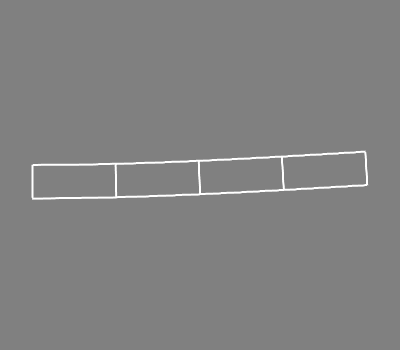

In [32]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case11" + ".png"))


### ケース12の変形図

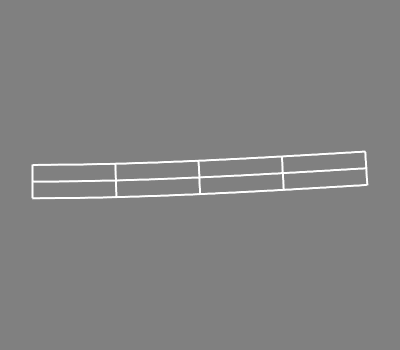

In [33]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case12" + ".png"))


### ケース13の変形図

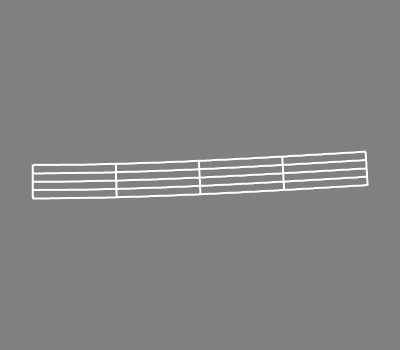

In [34]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case13" + ".png"))


### ケース14の変形図

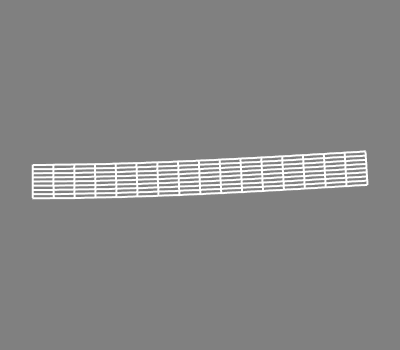

In [35]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case14" + ".png"))


### ケース21の変形図

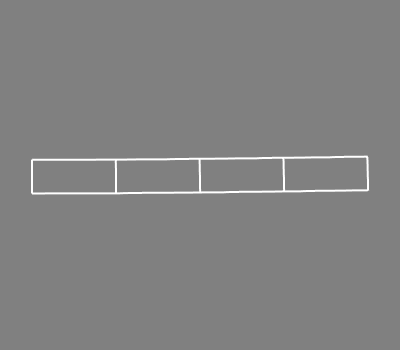

In [36]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case21" + ".png"))


### ケース22の変形図

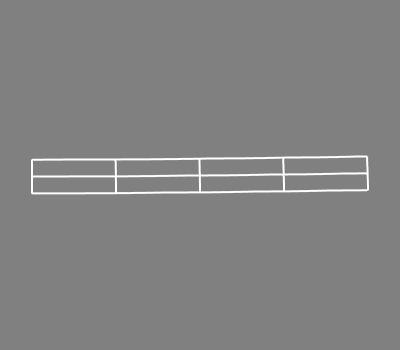

In [37]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case22" + ".png"))


### ケース23の変形図

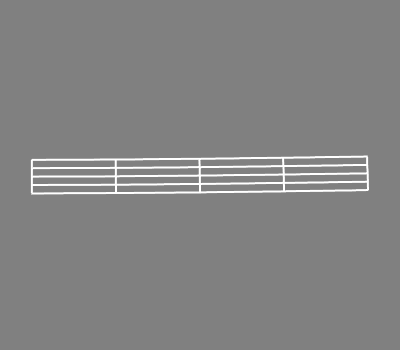

In [38]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case23" + ".png"))


### ケース24の変形図

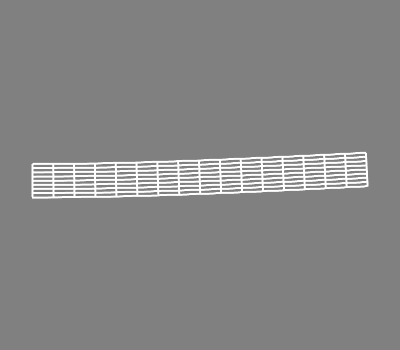

In [39]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case24" + ".png"))


### ケース31の変形図

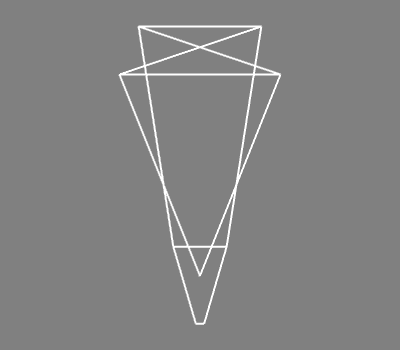

In [40]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case31" + ".png"))


### ケース32の変形図

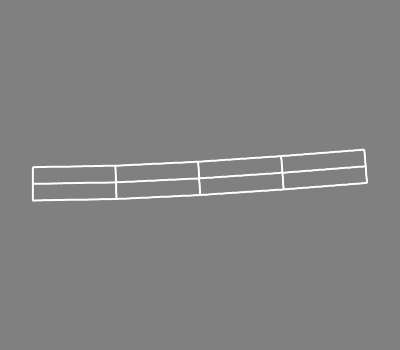

In [41]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case32" + ".png"))


### ケース33の変形図

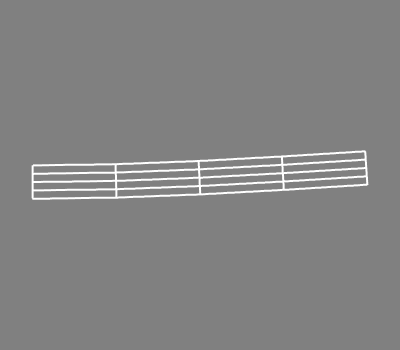

In [42]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case33" + ".png"))


### ケース34の変形図

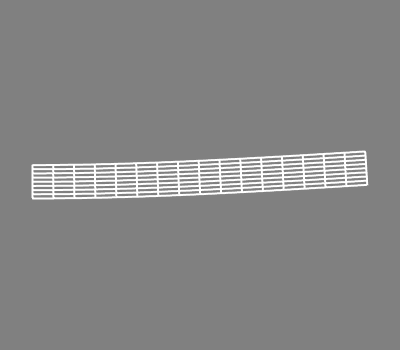

In [43]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case34" + ".png"))


### ケース41の変形図

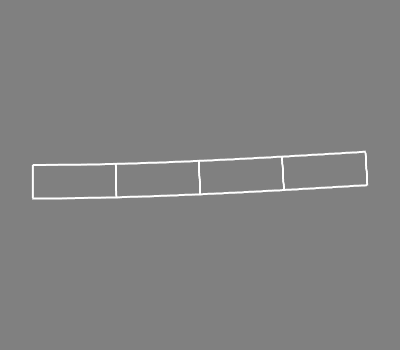

In [44]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case41" + ".png"))


### ケース42の変形図

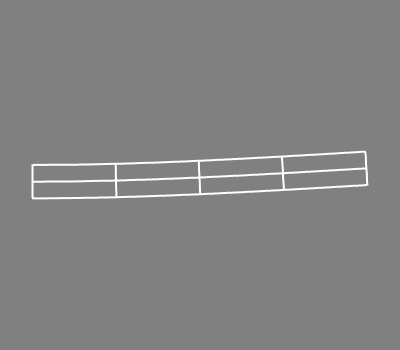

In [45]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case42" + ".png"))


### ケース43の変形図

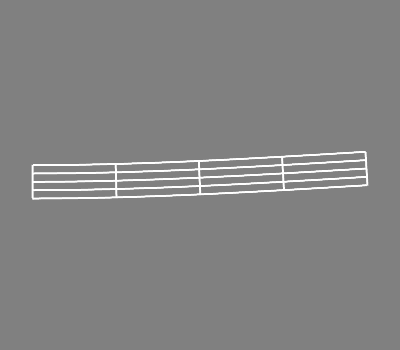

In [46]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case43" + ".png"))


### ケース44の変形図

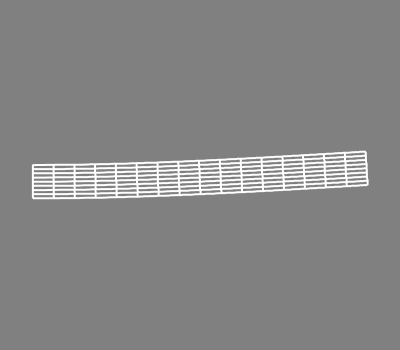

In [47]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case44" + ".png"))


### 理論解との比較

In [48]:
b = 1.0
I = b*h**3.0/12.0
dmax = 1.0/3.0*(F*L**3)/(E*I)
dmax

0.4

各ケースの変形と理論解の比を計算します。

In [49]:
!pip install pandas==0.24.2

In [50]:
import pandas as pd

pd.options.display.float_format = "{:.2f}".format


data = []

columns = ["ケース名", "理論解との比率"]

for md, mfu, case in zip(mds, mfus, cases):
    u = md.variable("u")
    dof = mfu.basic_dof_on_region(RIGHT_BOUND)
    data.append([case, round(max(u[dof] / dmax), 3)])

df = pd.DataFrame(data=data, columns=columns)
df


,ケース名,理論解との比率
0,case11,1.00
1,case12,1.00
2,case13,1.00
3,case14,1.01
4,case21,0.24
5,case22,0.24
6,case23,0.24
7,case24,0.84
8,case31,65235544550.74
9,case32,1.32
